<a href="https://colab.research.google.com/github/rlackdrhkd/Coding-Study/blob/main/%EA%B5%AD%EC%B1%85%EC%97%B0%EA%B5%AC%EA%B8%B0%EA%B4%80_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%8B%AC%ED%99%94%EA%B3%BC%EC%A0%95_2%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
"""
필요한 함수들을 불러오기:
keras & tensorflow - mnist 예제 데이터를 위한 라이브러리 (대체 가능),
numpy - 복잡한 산술계산,
matplotlib - 그래프 그리기,
sklearn - Random Forest, partial dependencd, 추가 데이터
등...
"""

from sklearn.datasets import fetch_openml
#from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
#from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error # 오차계산을 위한 함수 평균제곱오차(MSE)
from sklearn import preprocessing

from tensorflow.keras.utils import to_categorical # library for using Encoding
from tensorflow.keras.datasets import mnist # calling dataset 1
#from sklearn.datasets import load_boston # calling dataset 2

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
# keras에 있는 샘플데이터(mnist) 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data() # mnist에 내제되어 있는 데이터셋의 구성대로 불러오기
# 불러온 minst 데이터가 맞게 들어왔는지 확인
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [8]:
# data format 확인하기
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

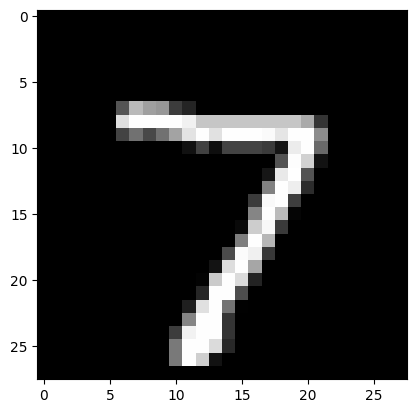

In [10]:
# data 그림으로 확인하기
plt.figure()
plt.imshow(x_test[0], cmap='gray')

In [14]:
# 계산의 용이성을 위해 데이터의 형태 바꾸기 (28개의 행 -> 1행)
# 28 X 28 매트릭스 --> 1 X 784 매트릭스로 변환 (부록 B 참조)
X_train = x_train.reshape(60000,784)
X_test = x_test.reshape(10000,784)
X_train = X_train.astype('float32')  # 데이터의 정규화를 위한 형식변경
X_test = X_test.astype('float32')
X_train /=255   # 256 색 데이터의 정규화(0~1 사이의 값으로 일반화, Normalization)
X_test /=255
print("X Training matrix shape", X_train.shape) # 변환된 데이터 확인
print("X Testing matrix shape", X_test.shape)

X Training matrix shape (60000, 784)
X Testing matrix shape (10000, 784)


In [15]:
Y_train = to_categorical(y_train, 10) # One-hot Encoding으로 입력값 일반화
Y_test = to_categorical(y_test, 10)
print("Y Training matrix shape", Y_train.shape)
print("Y Testing matrix shape", Y_test.shape)

Y Training matrix shape (60000, 10)
Y Testing matrix shape (10000, 10)


In [16]:
rf = RandomForestClassifier(n_jobs=-1) # use all CPU cores
rf.fit(X_train, Y_train)

RandomForestClassifier(n_jobs=-1)

In [17]:
# 모델의 교차검증
scores = cross_validate(rf,  X_train, Y_train,
                        return_train_score = True, n_jobs =-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9999958333333334 0.8895500000000001


In [18]:
# 훈련된 random forest 모델을 이용하여 테스트 하기
prediction = rf.predict(X_test)
result = (prediction == Y_test).mean()
print('Test accuracy:', result)

Test accuracy: 0.99


[5 0 4 0 5 0 7 3 2]


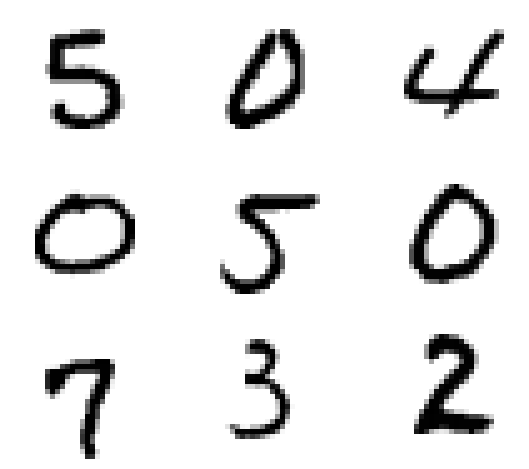

In [19]:
fig = plt.figure()
random_pick = np.random.randint(low=0, high=10000, size=9)
print(y_test[random_pick])

for i in range(9):
    idx = random_pick[i]
    img = np.reshape(X_test[idx], (28, 28))
    plot = fig.add_subplot(3, 3, i+1)
    plot.imshow(img, cmap = 'binary')
    plot.axis('off')
    plt.tight_layout()

In [43]:
X = pd.read_csv('/content/housing.csv')
Y = X.pop('medv')

In [46]:
# min-max normalization
min_max_scaler = preprocessing.MinMaxScaler()
new_X = min_max_scaler.fit_transform(X)
print(new_X)

[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 2.08015267e-01
  2.87234043e-01 8.96799117e-02]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 1.04961832e-01
  5.53191489e-01 2.04470199e-01]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 1.04961832e-01
  5.53191489e-01 6.34657837e-02]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 1.64122137e-01
  8.93617021e-01 1.07891832e-01]
 [1.16072990e-03 0.00000000e+00 4.20454545e-01 ... 1.64122137e-01
  8.93617021e-01 1.31070640e-01]
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 1.64122137e-01
  8.93617021e-01 1.69701987e-01]]


In [47]:
# 데이터 형식 train과 test로 구분하여 불러온 뒤 각각 target 값을 분리하여 저장

"""
Dataset 구성도
---------------------------------
|    X_train     |    Y_train   |     <-   훈련용
---------------------------------
|    X_test      |    Y_test    |     <-   테스트용
---------------------------------
"""

X_train, X_test, Y_train, Y_test = train_test_split(new_X, Y.to_numpy(), test_size = 0.2, random_state=42)

In [48]:
# RandomForestClassifier 는 실수(float)에 잘 작동되지 않아서 RandomForestRegressor를 이용
regr = RandomForestRegressor(max_depth = 5, random_state = 42, n_estimators = 100)
regr.fit(X_train, Y_train)

Y_predict_train = regr.predict(X_train)
Y_predict_test = regr.predict(X_test)

mse_train = mean_squared_error(Y_train, Y_predict_train)
mse_test = mean_squared_error(Y_test, Y_predict_test)
print(mse_train)
print(mse_test)

5.807978503762446
8.750509638571966


In [50]:
# 모델의 기본적인 중요도 확인
default_importance = regr.feature_importances_

sorted_idx = regr.feature_importances_.argsort()
plt.barh(boston_data.feature_names[sorted_idx], regr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

AttributeError: ignored